# 🎓 **Applied Artificial Intelligence Master**

## 🤖 **Course: Advanced Machine Learning Methods (Gpo 10)**

### 🏛️ Tecnológico de Monterrey

#### 👨‍🏫 **Lead Professor:** Dr. José Antonio Cantoral Ceballos
#### 👩‍🏫 **Assistant Professor:** Dra. Yetnalezi Quintas Ruiz

### 📊 **Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset**

#### 📅 **January 27th, 2025**

### 👥 Team 3

#### **Students:**
* 🧑‍💻 Luis Gerardo Sanchez Salazar (A01232963)
* 🧑‍💻 Javier Augusto Rebull Saucedo (A01795838)
* 🧑‍💻 José Manuel Toral Cruz (A01122243)
* 🧑‍💻 Juan Carlos Pérez Nava (A01795941)
* 🧑‍💻 Oscar Enrique García García (A01016093)

---

# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.

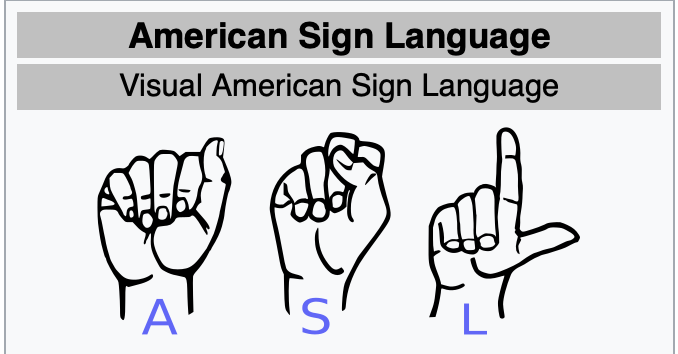

# 🤟 **American Sign Language (ASL): A Visual Language Journey**

American Sign Language (ASL) is a visual-gestural language predominantly used by the Deaf community in the United States and parts of Canada. Unlike spoken English, ASL possesses its own unique grammar and syntax, establishing it as a distinct and complete language.

## 📜 **History of ASL**

The origins of ASL trace back to the early 19th century with the establishment of the American School for the Deaf (ASD) in Hartford, Connecticut, in 1817. Founded by Thomas Hopkins Gallaudet and Laurent Clerc, a Deaf educator from France, the school became a melting pot for various sign languages. Clerc introduced elements of French Sign Language (LSF), which, combined with local sign systems such as Martha's Vineyard Sign Language (MVSL), led to the development of ASL.

Over time, ASL evolved, incorporating influences from various sign languages and adapting to the communicative needs of its users. Although it shares some similarities with LSF, ASL has developed its own distinct characteristics.

## 🎓 **Recognition and Use**

In the 1960s, linguist William Stokoe conducted pioneering research that recognized ASL as a legitimate language with its own syntax and grammar. His work was instrumental in changing perceptions and promoting the acceptance of ASL in educational and social contexts.

Today, ASL is used by a significant number of individuals in the United States. Beyond being the primary means of communication for many Deaf individuals, ASL is also learned by family members, interpreters, and professionals working with the Deaf community. The language continues to evolve, reflecting the dynamic nature of the Deaf community and its culture.

In [1]:
# Data manipulation and numerical operations
import numpy as np                 # For numerical operations and array manipulations
import pandas as pd               # For data manipulation and analysis

# Visualization libraries
import matplotlib.pyplot as plt    # For creating static visualizations
import seaborn as sns             # For statistical data visualization
sns.set_style("whitegrid")        # Set seaborn style
from tqdm import tqdm  # For progress visualization
import time # For progress visualization

# System and file operations
import os                         # For operating system operations like file paths
import string                     # For string operations and manipulations

# Google Drive download utility
import gdown                      # For downloading files from Google Drive

In [2]:
%matplotlib inline

# Optional: Set random seed for reproducibility
np.random.seed(42)

# Optional: Configure pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 100)      # Show up to 100 rows

# Optional: Set figure size for better visualization
plt.rcParams['figure.figsize'] = [12, 8]    # Default figure size
plt.rcParams['figure.dpi'] = 100            # Figure resolution

# Optional: Set seaborn plotting context
sns.set_context("notebook", font_scale=1.2)  # Set context for better readability

In [3]:
# Create directory for ASL (American Sign Language) dataset
# Using -p flag to avoid errors if directory already exists
!mkdir -p asl_data

# Define URLs for the training and validation datasets
# These URLs point to Google Drive files containing sign language MNIST data
train_url = (
   'https://drive.google.com/uc?id=112F_j2U-7wysYmpRa6FT4tMw5s6xShFr'
)
valid_url = (
   'https://drive.google.com/uc?id=1hKEKFsw4hRl4UXU0Na-LLLE0sRwb5AIr'
)

# Download datasets using gdown library
# quiet=False shows download progress
print("Downloading training dataset...")
gdown.download(
   train_url,
   'asl_data/sign_mnist_train.csv',
   quiet=False
)

print("Downloading validation dataset...")
gdown.download(
   valid_url,
   'asl_data/sign_mnist_valid.csv',
   quiet=False
)

# Load the downloaded CSV files into pandas DataFrames
print("Loading datasets into memory...")
train_df = pd.read_csv('asl_data/sign_mnist_train.csv')
valid_df = pd.read_csv('asl_data/sign_mnist_valid.csv')

# Print dataset dimensions to verify successful loading
print("\nDataset Information:")
print("-" * 20)
print(f"Training data shape: {train_df.shape}")
print(f"Validation data shape: {valid_df.shape}")

Downloading...
From: https://drive.google.com/uc?id=112F_j2U-7wysYmpRa6FT4tMw5s6xShFr
To: /content/asl_data/sign_mnist_train.csv
100%|██████████| 83.3M/83.3M [00:01<00:00, 67.4MB/s]


Downloading...
From: https://drive.google.com/uc?id=1hKEKFsw4hRl4UXU0Na-LLLE0sRwb5AIr
To: /content/asl_data/sign_mnist_valid.csv
100%|██████████| 21.8M/21.8M [00:00<00:00, 83.3MB/s]


Loading datasets into memory...

Dataset Information:
--------------------
Training data shape: (27455, 785)
Validation data shape: (7172, 785)


In [31]:
# DataFrame display settings
pd.set_option('display.precision', 3)        # Set decimal precision
pd.set_option('display.max_columns', None)   # Display all columns
pd.set_option('display.width', 1000)         # Wide format display

def display_dataframe_preview(df, title="Dataset Preview"):
    """
    Display DataFrame with elegant GitHub formatting.

    Args:
        df: DataFrame to display
        title: Title for the preview section
    """
    # Header display
    print(f"\n## {title}")
    print("```")

    # Display first 5 rows
    print("\n• First 5 Rows:")
    print(df.head().to_string(
        index=True,
        justify='center',
        float_format=lambda x: '{:.3f}'.format(x) if isinstance(x, float) else x
    ))

    # Display summary statistics
    print("\n• Summary Statistics:")
    print(df.describe().to_string(
        float_format=lambda x: '{:.3f}'.format(x)
    ))
    print("```\n")

# Display the DataFrame preview
display_dataframe_preview(train_df)


## Dataset Preview
```

• First 5 Rows:
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  pixel16  pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  pixel32  pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  pixel40  pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  pixel48  pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  pixel64  pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  pixel72  pixel73  pixel74  pixel75  pixel76  pixel77  pixel78  pixel79  pixel80  pixel81  pixel82  pixel83  pixel84  pixel85  pixel86  pixel87  pixel88  pixel89  pixel90  pixel91  pixel92  pixel93  pixel94  pixel95  pixel96  pixel97  pixel98  pixel99  pixel100  pixel101  pixel102  pixel103  pixel104  pixel105  pixel106  pixe

# **🖼️ Images Import**

In [5]:
# Convert the target variable 'label' from training DataFrame to numpy array
y_train = np.array(train_df['label'])

# Convert the target variable 'label' from validation DataFrame to numpy array
y_val = np.array(valid_df['label'])

# Remove the target column 'label' from training DataFrame since it won't be used as a feature
del train_df['label']

# Remove the target column 'label' from validation DataFrame since it won't be used as a feature
del valid_df['label']

# Convert all remaining training data to numpy array with float32 data type
# float32 is commonly used in deep learning for memory efficiency
x_train = train_df.values.astype(np.float32)

# Convert all remaining validation data to numpy array with float32 data type
x_val = valid_df.values.astype(np.float32)

# Print shapes with enhanced formatting (notebook-friendly version)
print("\n" + "="*50)
print("🔍 DATA SHAPES AFTER PROCESSING 🔍".center(50))
print("="*50)

print(f"\n📊 Training Data:")
print(f"   ├─ Features (x_train): {x_train.shape}")
print(f"   └─ Labels (y_train):   {y_train.shape}")

print(f"\n🎯 Validation Data:")
print(f"   ├─ Features (x_val):   {x_val.shape}")
print(f"   └─ Labels (y_val):     {y_val.shape}")
print("\n" + "="*50 + "\n")


         🔍 DATA SHAPES AFTER PROCESSING 🔍         

📊 Training Data:
   ├─ Features (x_train): (27455, 784)
   └─ Labels (y_train):   (27455,)

🎯 Validation Data:
   ├─ Features (x_val):   (7172, 784)
   └─ Labels (y_val):     (7172,)




In [6]:
def split_val_test(x, y, pct=0.5, shuffle=True):
   '''
   Create a function that splits validation data into validation and test sets.

   Parameters:
       x (numpy.ndarray): Features array to be split
       y (numpy.ndarray): Labels array to be split
       pct (float): Percentage of data for validation set (default 0.5)
       shuffle (bool): Whether to randomly shuffle data before splitting (default True)

   Returns:
       tuple: Contains (x_val, y_val, x_test, y_test)
           - x_val (numpy.ndarray): Validation features
           - y_val (numpy.ndarray): Validation labels
           - x_test (numpy.ndarray): Test features
           - y_test (numpy.ndarray): Test labels
   '''
   # Calculate total number of samples in dataset
   n_samples = len(x)

   # Calculate number of samples for validation set based on percentage
   n_val = int(n_samples * pct)

   if shuffle:
       # Create a random permutation of indices for shuffling
       indexes = np.random.permutation(n_samples)

       # Shuffle both features and labels using same index permutation
       # This maintains the correspondence between features and their labels
       x = x[indexes]
       y = y[indexes]

   # Split the data into validation and test sets
   x_val = x[:n_val]    # First n_val samples for validation
   y_val = y[:n_val]    # Corresponding validation labels
   x_test = x[n_val:]   # Remaining samples for test
   y_test = y[n_val:]   # Corresponding test labels

   # Print summary of the split (notebook-friendly version)
   print("\n" + "="*60)
   print("🔄 DATA SPLITTING SUMMARY 🔄".center(60))
   print("="*60)

   print(f"\n📊 Original Data:")
   print(f"   └─ Total samples: {n_samples}")

   print(f"\n🎯 After Split:")
   print(f"   ├─ Validation set: {len(x_val)} samples ({pct*100:.1f}%)")
   print(f"   └─ Test set: {len(x_test)} samples ({(1-pct)*100:.1f}%)")

   print(f"\n📐 Shapes:")
   print(f"   ├─ x_val: {x_val.shape}")
   print(f"   ├─ y_val: {y_val.shape}")
   print(f"   ├─ x_test: {x_test.shape}")
   print(f"   └─ y_test: {y_test.shape}")
   print("\n" + "="*60 + "\n")

   return x_val, y_val, x_test, y_test

In [7]:
# Split x_val and y_val into validation and test sets
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)


                 🔄 DATA SPLITTING SUMMARY 🔄                 

📊 Original Data:
   └─ Total samples: 7172

🎯 After Split:
   ├─ Validation set: 3586 samples (50.0%)
   └─ Test set: 3586 samples (50.0%)

📐 Shapes:
   ├─ x_val: (3586, 784)
   ├─ y_val: (3586,)
   ├─ x_test: (3586, 784)
   └─ y_test: (3586,)




In [8]:
# Create a list of lowercase letters from a-z
alphabet = list(string.ascii_lowercase)

# Remove letters that require movement in American Sign Language (ASL)
alphabet.remove('j')
alphabet.remove('z')

# Create a decorative border
border = "✨" * 30

# Print formatted output with emojis and styling
print(border)
print("🤟 ASL-Modified Alphabet 🤟")
print(border)
print()
print("📝 Modified alphabet:", ' '.join(alphabet).upper())
print(f"📊 Total letters: {len(alphabet)}")
print()
print("ℹ️  Removed letters:")
print("   • 'j' 👉 Requires tracing 'J' shape in ASL")
print("   • 'z' 👉 Requires tracing 'Z' shape in ASL")
print()
print("🔍 Fun fact: Most ASL letters use static hand positions,")
print("   but 'j' and 'z' are special because they need movement!")
print(border)

✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
🤟 ASL-Modified Alphabet 🤟
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨

📝 Modified alphabet: A B C D E F G H I K L M N O P Q R S T U V W X Y
📊 Total letters: 24

ℹ️  Removed letters:
   • 'j' 👉 Requires tracing 'J' shape in ASL
   • 'z' 👉 Requires tracing 'Z' shape in ASL

🔍 Fun fact: Most ASL letters use static hand positions,
   but 'j' and 'z' are special because they need movement!
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨


# 🔠 **Normalize**

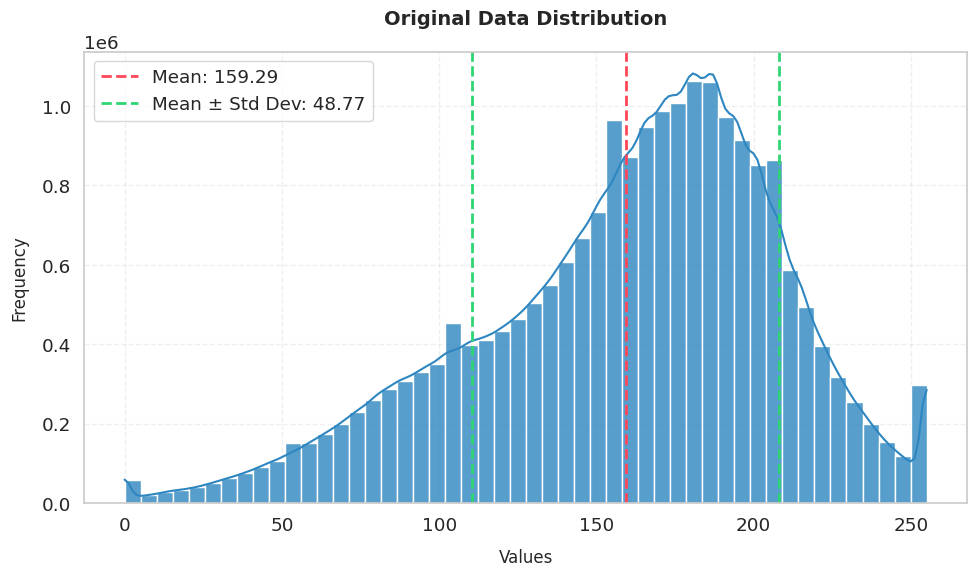


                📊 Original Data Statistics 📊                

📈 Current Statistics:
──────────────────────────────
• Mean:               159.2908
• Standard Deviation: 48.7695
• Minimum Value:      0.0000
• Maximum Value:      255.0000
• Range:             255.0000



In [9]:
def plot_distribution_with_stats(data, title):
    """Helper function to create distribution plot with statistics"""
    # Calculate statistics
    mean = data.mean()
    std_dev = data.std()
    min_val = data.min()
    max_val = data.max()

    # Create histogram with deeper blue color
    sns.histplot(data=data.flatten(),
                bins=50,
                kde=True,
                color='#2E86C1',  # Deeper blue color
                edgecolor='white',
                alpha=0.8)        # Slightly less transparent

    # Add statistical markers with bolder colors
    plt.axvline(mean, color='#FF4757', linestyle='--', linewidth=2,
                label=f'Mean: {mean:.2f}')
    plt.axvline(mean + std_dev, color='#2ED573', linestyle='--', linewidth=2,
                label=f'Mean ± Std Dev: {std_dev:.2f}')
    plt.axvline(mean - std_dev, color='#2ED573', linestyle='--', linewidth=2)

    plt.title(title, fontsize=14, pad=20, fontweight='bold')
    plt.xlabel('Values', fontsize=12, labelpad=10)
    plt.ylabel('Frequency', fontsize=12, labelpad=10)
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.legend()

    return mean, std_dev, min_val, max_val

# Set up the plot style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plot original data
mean_orig, std_orig, min_orig, max_orig = plot_distribution_with_stats(
    x_train,
    'Original Data Distribution'
)

plt.tight_layout()
plt.show()

# Print statistical summaries
print("\n" + "="*60)
print("📊 Original Data Statistics 📊".center(60))
print("="*60 + "\n")

print("📈 Current Statistics:")
print("─"*30)
print(f"• Mean:               {mean_orig:.4f}")
print(f"• Standard Deviation: {std_orig:.4f}")
print(f"• Minimum Value:      {min_orig:.4f}")
print(f"• Maximum Value:      {max_orig:.4f}")
print(f"• Range:             {max_orig - min_orig:.4f}")

print("\n" + "="*60)

In [10]:
def normalise(x_mean, x_std, x_data):
    """
    Normalize data using z-score normalization (standardization).

    Parameters:
    -----------
    x_mean : float
        The mean value of the original dataset
    x_std : float
        The standard deviation of the original dataset
    x_data : array-like
        The data to be normalized

    Returns:
    --------
    array-like
        Normalized data with mean ≈ 0 and standard deviation ≈ 1

    Formula:
    --------
    z = (x - μ) / σ
    where:
        z = normalized value
        x = original value
        μ = mean of the distribution
        σ = standard deviation of the distribution
    """

    # Subtract the mean (centering the data around 0)
    # Then divide by standard deviation (scaling the data)
    # This transforms the data to have mean=0 and std=1
    return (x_data - x_mean) / x_std

In [11]:
# Calculate mean and standard deviation from training data
x_mean = x_train.mean()  # Compute the mean of training data
x_std = x_train.std()    # Compute the standard deviation of training data

# Normalize all datasets using training statistics
# Important: We use training mean/std for all sets to prevent data leakage
x_train = normalise(x_mean, x_std, x_train)  # Normalize training data
x_val = normalise(x_mean, x_std, x_val)      # Normalize validation data using training stats
x_test = normalise(x_mean, x_std, x_test)    # Normalize test data using training stats

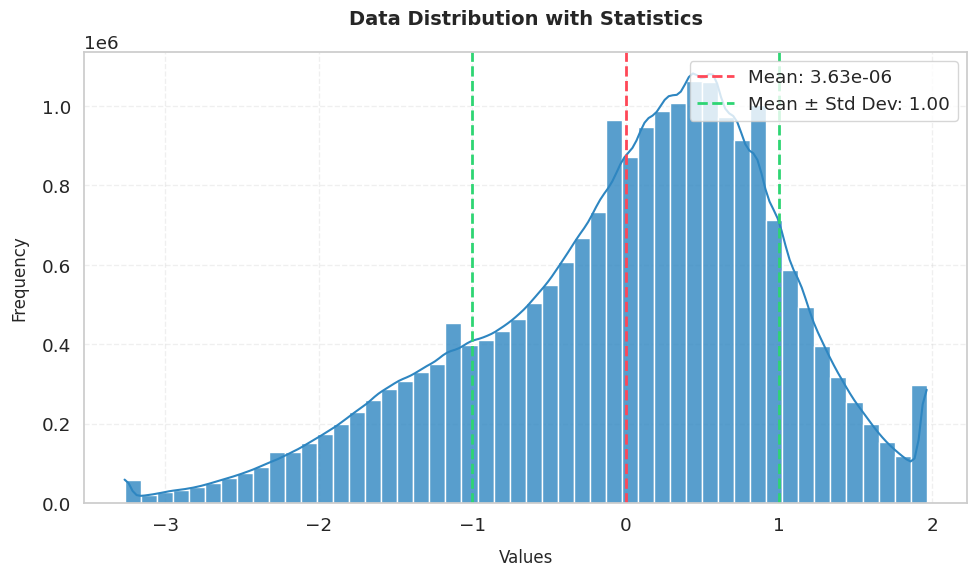


                  📊 Statistical Summary 📊                   

📈 Data Statistics:
──────────────────────────────
• Mean:               3.6268e-06
• Standard Deviation: 1.0000
• Minimum Value:      -3.2662
• Maximum Value:      1.9625
• Range:             5.2287



In [12]:
# Set the visual style for the plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Calculate key statistical measures
mean = x_train.mean()
std_dev = x_train.std()
min_val = x_train.min()
max_val = x_train.max()

# Create histogram with density estimation
sns.histplot(data=x_train.flatten(),
           bins=50,            # Number of histogram bins
           kde=True,           # Add kernel density estimation curve
           color='#2E86C1',    # Deep blue color
           edgecolor='white',  # Edge color of bars
           alpha=0.8)          # Transparency level

# Add statistical reference lines
plt.axvline(mean, color='#FF4757', linestyle='--', linewidth=2,
           label=f'Mean: {mean:.2e}')  # Red vertical line for mean
plt.axvline(mean + std_dev, color='#2ED573', linestyle='--', linewidth=2,
           label=f'Mean ± Std Dev: {std_dev:.2f}')  # Green lines for standard deviation bounds
plt.axvline(mean - std_dev, color='#2ED573', linestyle='--', linewidth=2)

# Set title and labels with improved formatting
plt.title('Data Distribution with Statistics',
         fontsize=14,
         pad=20,
         fontweight='bold')
plt.xlabel('Values', fontsize=12, labelpad=10)
plt.ylabel('Frequency', fontsize=12, labelpad=10)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Enhance legend positioning and style
plt.legend(loc='upper right',
         frameon=True,
         fancybox=True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

# Print comprehensive statistical summary
print("\n" + "="*60)
print("📊 Statistical Summary 📊".center(60))
print("="*60 + "\n")

print("📈 Data Statistics:")
print("─"*30)
print(f"• Mean:               {mean:.4e}")
print(f"• Standard Deviation: {std_dev:.4f}")
print(f"• Minimum Value:      {min_val:.4f}")
print(f"• Maximum Value:      {max_val:.4f}")
print(f"• Range:             {max_val - min_val:.4f}")

print("\n" + "="*60)

# 📉 **Sample Plotting**

In [13]:
def plot_asl_samples(x_data, y_data, n_samples=3, random_seed=None):
    """
    Visualize random ASL (American Sign Language) letter samples.

    Parameters:
    -----------
    x_data : array-like
        The image data
    y_data : array-like
        The corresponding labels
    n_samples : int, optional (default=3)
        Number of random samples to display
    random_seed : int, optional (default=None)
        Random seed for reproducibility
    """

    # Set random seed if provided
    if random_seed is not None:
        np.random.seed(random_seed)

    # Create alphabet list (excluding 'j' and 'z' which require movement)
    alphabet = list(string.ascii_lowercase)
    alphabet.remove('j')  # 'j' requires a motion
    alphabet.remove('z')  # 'z' requires a motion

    # Set up the figure with adequate size
    plt.figure(figsize=(5*n_samples, 5))

    # Plot each random sample
    for i in range(n_samples):
        # Generate random index
        idx = np.random.randint(len(y_data))

        # Create subplot
        plt.subplot(1, n_samples, i+1)

        # Reshape and display image
        img = x_data[idx].reshape(28, 28)
        plt.imshow(img, cmap='gray')

        # Add title with letter information
        plt.title(f'Letter: {alphabet[y_data[idx]].upper()}',
                 fontsize=14,
                 pad=10,
                 fontweight='bold')

        # Remove axes for cleaner visualization
        plt.axis('off')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


          🤟 ASL Letters Visualization 🤟           


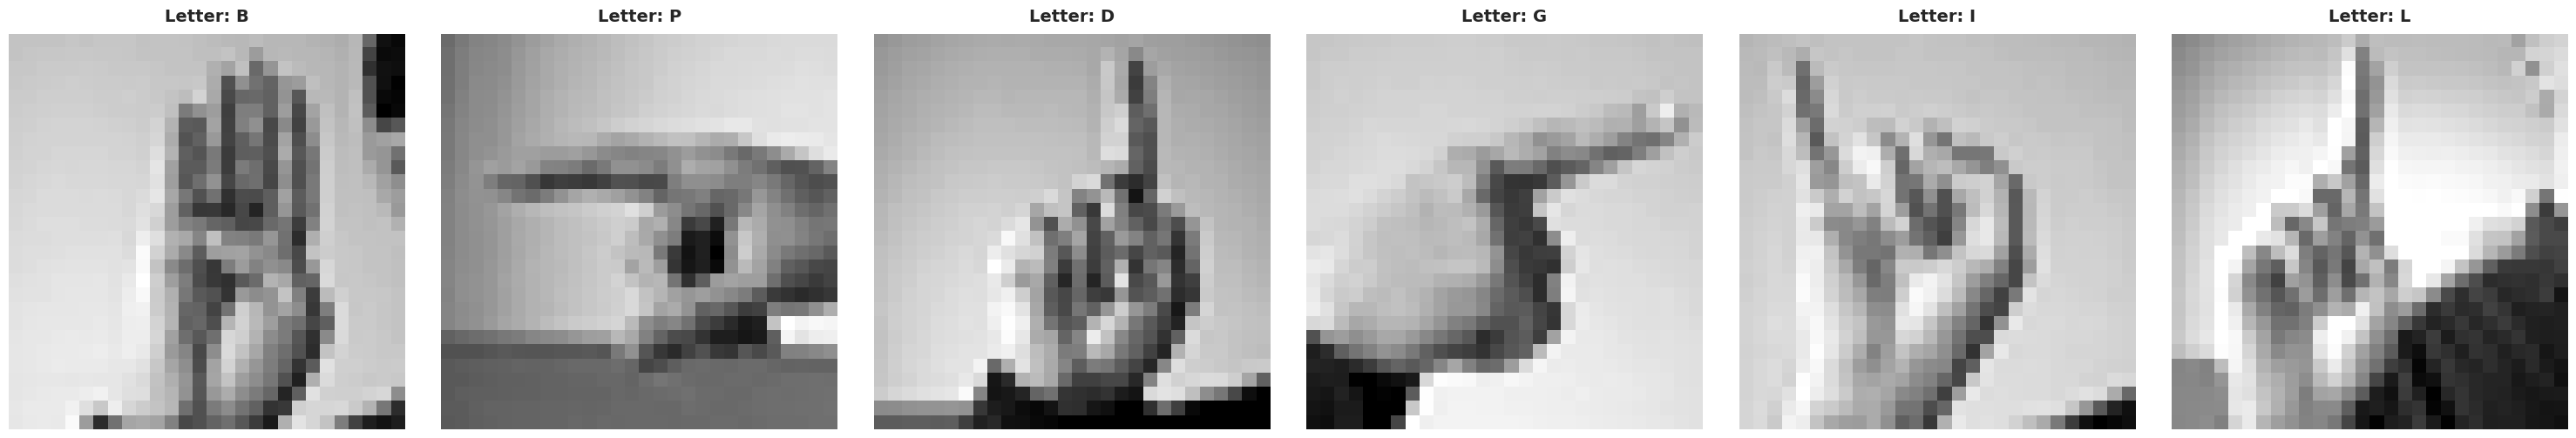

In [14]:
# Example usage with test data
def plot_single_asl(x_data, y_data, random_seed=None):
    """
    Visualize a single random ASL letter sample.

    Parameters:
    -----------
    x_data : array-like
        The image data
    y_data : array-like
        The corresponding labels
    random_seed : int, optional (default=None)
        Random seed for reproducibility
    """
    plot_asl_samples(x_data, y_data, n_samples=1, random_seed=random_seed)

# Print information about displayed samples
print("\n" + "="*50)
print("🤟 ASL Letters Visualization 🤟".center(50))
print("="*50)

# Example calls:
# For multiple samples
plot_asl_samples(x_test, y_test, n_samples=6)

# For a single sample
# plot_single_asl(x_test, y_test)

# 📐 Equations for our Model

## Neural Network Forward Pass and Loss Calculation Equations

--------------------------------------------------------------------
1️⃣ First Layer (Input → Hidden Layer)
--------------------------------------------------------------------
$$z^1 = W^1 X + b^1$$

- W¹: Weight matrix for first layer
- X:  Input data
- b¹: Bias vector
- z¹: Pre-activation values

--------------------------------------------------------------------
2️⃣ Activation Function
--------------------------------------------------------------------
$$a^1 = ReLU(z^1)$$

- ReLU(x) = max(0,x)
- Keeps positive values
- Sets negative values to 0
- a¹: Activated values of hidden layer

--------------------------------------------------------------------
3️⃣ Second Layer (Hidden → Output Layer)
--------------------------------------------------------------------
$$z^2 = W^2 a^1 + b^2$$

- W²: Weight matrix for second layer
- a¹: Activated values from previous layer
- b²: Bias vector
- z²: Pre-activation output values

--------------------------------------------------------------------
4️⃣ Softmax Function (Probability Distribution)
--------------------------------------------------------------------
$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$

- e^z: Exponential of each output
- Denominator normalizes values
- ŷ: Predicted probabilities (sum to 1)

--------------------------------------------------------------------
5️⃣ Cross-Entropy Loss (Single Sample)
--------------------------------------------------------------------
$$ \mathcal{L}(\hat{y}^{i}, y^{i}) = - y^{i} \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$

- y^i: True label (one-hot encoded)
- ŷ^i: Predicted probability
- ln: Natural logarithm

--------------------------------------------------------------------
6️⃣ Cost Function (Average Loss)
--------------------------------------------------------------------
$$ \mathcal{J}(w, b) = \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

- Averages loss across all samples
- num_samples: Total training examples
- Goal: Minimize this during training

--------------------------------------------------------------------

# Additional Funtions

#### Mini batches

# 🔄 **Mini-batches in Deep Learning**

### 📦 **Understanding Mini-batch Processing**

Mini-batch processing is a crucial technique in machine learning, particularly in deep learning. Here's why they're important:

### 🎯 **Purpose**

* Mini-batches divide the training data into smaller subsets

* They optimize the trade-off between computational efficiency and model update frequency

* They help avoid memory constraints when working with large datasets

### ✨ **Advantages**

* **Memory Efficiency:** Process smaller chunks of data at a time

* **Training Speed:** Faster than processing one sample at a time

* **Stability:** More stable than using the entire dataset at once

* **Generalization:** Can help improve model generalization through noise in gradient estimates

### 🔑 **Key Concepts**

* **Batch Size:** Number of samples in each mini-batch

* **Iteration:** Processing one mini-batch

* **Epoch:** Processing all mini-batches once

### 📊 **Common Batch Sizes**

* Typically powers of 2: 32, 64, 128, 256

* Chosen based on memory constraints and training dynamics

---

*Note: The choice of batch size is crucial for model training as it affects both performance and computational efficiency.*

In [15]:
def create_minibatches(batch_size, features, labels, shuffle=True):
   """
   Creates mini-batches from input data for efficient training.

   Args:
       batch_size (int): Number of samples in each mini-batch
       features (numpy.ndarray): Input features/data (X)
       labels (numpy.ndarray): Target labels/values (y)
       shuffle (bool): Whether to shuffle the data before creating batches (default: True)

   Returns:
       generator: Yields tuples of (X_batch, y_batch) for each mini-batch
   """
   # Validate input dimensions
   assert features.shape[0] == labels.shape[0], \
       f'Sample size mismatch: features ({features.shape[0]}) != labels ({labels.shape[0]})'

   total_samples = features.shape[0]

   # Shuffle data if requested
   if shuffle:
       indices = np.arange(total_samples)
       np.random.shuffle(indices)
       features = features[indices]
       labels = labels[indices]

   # Generate mini-batches
   for i in range(0, total_samples, batch_size):
       X_batch = features[i:i + batch_size]
       y_batch = labels[i:i + batch_size]
       yield X_batch, y_batch

## 🧩 Our Linear, ReLU, and Sequential Classes

##  🦯 Linear Class

### 🎯 **Purpose**

* Implements a fully connected neural network layer
* Performs the linear transformation Z = WX + b
* Includes forward and backward propagation

### 🔧 **Key Components**

#### 🏗️ **Initialization (__init__)**

* Uses He (Kaiming) initialization for weights
* Helps maintain good gradient flow
* Creates weights (W) and bias (b) parameters

#### ⏩ **Forward Pass (__call__)**

* Performs matrix multiplication: WX + b
* Maps input features to output features

#### ⏪ **Backward Pass (backward)**

* Computes gradients using chain rule
* Updates three gradients: input, weights, and bias

### 📐 **Mathematical Operations**

```python
Forward: Z = WX + b
Backward:
- dL/dX = W^T * dL/dZ
- dL/dW = dL/dZ * X^T
- dL/db = sum(dL/dZ, axis=1)
```

### 📏 **Shape Information**

* W: (output_size, input_size)
* b: (output_size, 1)
* X: (input_size, batch_size)
* Z: (output_size, batch_size)

### 💡 **Key Features**

* Uses He initialization for better training

* Supports batch processing

* Maintains gradients for backpropagation

* Uses numpy tensors for efficient computation

---

*This implementation is suitable for building neural networks and includes all necessary components for both forward and backward propagation while maintaining efficient computation through numpy operations.*

In [16]:
class np_tensor(np.ndarray):
    """
    Custom NumPy tensor class that inherits from numpy.ndarray.

    This class extends numpy.ndarray to create a custom tensor implementation
    that maintains full compatibility with NumPy operations while allowing
    for additional tensor-specific functionality.

    Example:
        # Create a tensor from a NumPy array
        array = np.array([1, 2, 3])
        tensor = array.view(np_tensor)

    Notes:
        - Inherits all numpy.ndarray methods and attributes
        - Can be used anywhere a regular NumPy array is expected
        - Maintains the same memory layout as numpy.ndarray
        - Supports all NumPy universal functions (ufuncs)

    References:
        - NumPy documentation: https://numpy.org/doc/stable/user/basics.subclassing.html
        - NumPy array interface: https://numpy.org/doc/stable/reference/arrays.interface.html

    See Also:
        numpy.ndarray: The base NumPy array class
        numpy.asarray: Convert input to a NumPy array
    """
    pass  # No additional implementation needed as we're just inheriting ndarray functionality

In [17]:
class Linear:
    """
    Implementation of a linear (fully connected) neural network layer.
    Performs the operation: Z = WX + b where W is weights and b is bias.
    """

    def __init__(self, input_size, output_size):
        """
        Initialize the linear layer with He (Kaiming) initialization.

        Args:
            input_size (int): Number of input features
            output_size (int): Number of output features/neurons

        Notes:
            He initialization helps prevent vanishing/exploding gradients
            by scaling weights based on the input size.
        """
        # Initialize weights using He initialization
        # Formula: W = randn * sqrt(2/n_in) where n_in is input size
        self.W = (np.random.randn(output_size, input_size) /
                 np.sqrt(input_size/2)).view(np_tensor)

        # Initialize biases with zeros
        # Shape: (output_size, 1) for broadcasting
        self.b = (np.zeros((output_size, 1))).view(np_tensor)

    def __call__(self, X):
        """
        Forward pass of the linear layer (Z = WX + b).

        Args:
            X (np_tensor): Input tensor of shape (input_size, batch_size)

        Returns:
            Z (np_tensor): Output tensor of shape (output_size, batch_size)
        """
        # Matrix multiplication of weights with input plus bias
        Z = self.W @ X + self.b
        return Z

    def backward(self, X, Z):
        """
        Backward pass: compute gradients of weights, bias, and input.

        Args:
            X (np_tensor): Input tensor from forward pass
            Z (np_tensor): Output tensor from forward pass with accumulated gradients

        Notes:
            Updates the following gradients:
            - X.grad: Gradient with respect to input
            - W.grad: Gradient with respect to weights
            - b.grad: Gradient with respect to bias
        """
        # Compute gradient with respect to input (dL/dX)
        X.grad = self.W.T @ Z.grad

        # Compute gradient with respect to weights (dL/dW)
        self.W.grad = Z.grad @ X.T

        # Compute gradient with respect to bias (dL/db)
        # Sum across batch dimension (axis=1) while keeping 2D shape
        self.b.grad = np.sum(Z.grad, axis=1, keepdims=True)

## ⚡ ReLU Class

🧠 ReLU (Rectified Linear Unit) ⚡

## 🎯 Purpose
* Non-linear activation function
* Helps neural networks learn complex patterns
* Solves the vanishing gradient problem

## ⚙️ Key Properties
* Simple computation: f(x) = max(0, x)
* Sparse activation (many neurons output 0)
* Non-saturating for positive values
* Gradient is either 0 or 1

## ✨ Advantages
* Fast to compute
* Helps with gradient flow
* Biological plausibility (similar to neuron firing)
* Introduces non-linearity without vanishing gradients

---

*The implementation includes both forward pass (applying the ReLU function) and backward pass (computing gradients) required for neural network training. 🚀*

In [18]:
class ReLU:
    """
    Rectified Linear Unit (ReLU) activation function.
    Implements f(x) = max(0, x)
    A simple non-linear activation function that outputs the input directly
    if positive, and zero otherwise.
    """

    def __call__(self, Z):
        """
        Forward pass of ReLU activation function.

        Args:
            Z (np_tensor): Input tensor of any shape

        Returns:
            np_tensor: max(0, Z) element-wise
        """
        return np.maximum(0, Z)

    def backward(self, Z, A):
        """
        Backward pass: compute gradients of the ReLU function.

        Args:
            Z (np_tensor): Input tensor from forward pass
            A (np_tensor): Activated output tensor with accumulated gradients

        Notes:
            ReLU derivative is:
            - 1 for inputs > 0
            - 0 for inputs <= 0
        """
        # Copy upstream gradients
        Z.grad = A.grad.copy()

        # Zero out gradients where input was <= 0
        Z.grad[Z <= 0] = 0

### ✨ Sequential Class

## 🎯 Purpose
* Manages a sequence of neural network layers
* Handles forward propagation, backward propagation, and parameter updates
* Provides prediction functionality

## ⚙️ Key Components
* Layer Management: Stores and sequences layers
* Forward Pass: Processes input through all layers
* Backward Pass: Computes gradients in reverse order
* Parameter Updates: Applies gradient descent
* Prediction: Converts network output to class prediction

## 🔄 Features
* Stores intermediate outputs for backpropagation
* Supports any combination of layers
* Implements gradient descent optimization
* Handles both training and inference


---

*This implementation provides a flexible framework for building and training neural networks by composing layers in sequence. 🚀*

In [19]:
class Sequential_layers:
    """
    Sequential container for neural network layers.
    Allows for easy composition of layers and handles forward/backward passes.
    """

    def __init__(self, layers):
        """
        Initialize the sequential container with a list of layers.

        Args:
            layers (list): List of layers (e.g., Linear, ReLU)
                          in the order they should be applied
        """
        self.layers = layers
        self.x = None  # Store input
        self.outputs = {}  # Store intermediate outputs

    def __call__(self, X):
        """
        Forward pass through all layers in sequence.

        Args:
            X (np_tensor): Input tensor

        Returns:
            np_tensor: Output of the final layer

        Notes:
            Stores intermediate outputs in self.outputs dictionary
            for use in backward pass
        """
        self.x = X
        self.outputs['l0'] = self.x  # Store input

        # Process through each layer sequentially
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)  # Apply layer
            self.outputs['l'+str(i)] = self.x  # Store output

        return self.x

    def backward(self):
        """
        Backward pass through all layers in reverse sequence.

        Computes gradients for all layers using stored intermediate
        outputs from forward pass.
        """
        # Process layers in reverse order
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(
                self.outputs['l'+str(i)],    # Layer input
                self.outputs['l'+str(i+1)]   # Layer output
            )

    def update(self, learning_rate=1e-3):
        """
        Update model parameters using computed gradients.

        Args:
            learning_rate (float): Learning rate for gradient descent
                                 Default: 0.001

        Notes:
            Only updates parameters of Linear layers (skips ReLU)
        """
        for layer in self.layers:
            if isinstance(layer, ReLU):
                continue  # Skip ReLU layers (no parameters)

            # Update weights and biases using gradient descent
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad

    def predict(self, X):
        """
        Make a prediction for input X.

        Args:
            X (np_tensor): Input tensor

        Returns:
            int: Index of the maximum value in the output
                (predicted class)
        """
        return np.argmax(self.__call__(X))

### 📉 Cost Function

✨ # Softmax + Cross-Entropy Loss 📊

## 🎯 Components
* Combines two operations commonly used in classification:
    * Softmax: Converts raw scores to probabilities
    * Cross-Entropy: Measures difference between predicted and true distributions

## ⚙️ Mathematical Components
`Softmax: p_i = exp(x_i) / Σ exp(x_j)`
`Cross-Entropy: L = -Σ y_i * log(p_i)`

## 🔄 Key Properties
* Softmax ensures outputs sum to 1 (valid probabilities)
* Cross-entropy penalizes incorrect predictions logarithmically
* Gradient has simple form: (p_i - y_i)
* Loss is always positive and is 0 only for perfect predictions

## ✨ Advantages
* Numerically stable implementation
* Efficient gradient computation
* Suitable for multi-class classification
* Provides probabilistic outputs

---
*This implementation handles both the forward pass (computing probabilities and loss) and backward pass (computing gradients) in a single function, making it efficient for neural network training. 🚀*

In [20]:
def softmaxXEntropy(x, y):
    """
    Compute Softmax activation and Cross-Entropy loss.

    Args:
        x (np_tensor): Raw output scores from the network (logits)
                      Shape: (num_classes, batch_size)
        y (np_tensor): True labels (ground truth)
                      Shape: (1, batch_size)

    Returns:
        tuple: (predictions, loss)
            - predictions: Softmax probabilities
            - loss: Average cross-entropy loss for the batch
    """
    # Get batch size for averaging
    batch_size = x.shape[1]

    # Compute Softmax probabilities
    # Step 1: Exponential of scores
    exp_scores = np.exp(x)
    # Step 2: Normalize to get probabilities
    probs = exp_scores / exp_scores.sum(axis=0)
    # Store predictions
    preds = probs.copy()

    # Compute Cross-Entropy Loss
    # Get probability of correct class for each sample
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    # Average negative log likelihood
    cost = np.sum(-np.log(y_hat)) / batch_size

    # Compute gradients for backpropagation
    # Gradient of softmax+cross-entropy is (p_i - y_i)
    probs[y.squeeze(), np.arange(batch_size)] -= 1  # Subtract 1 from correct class
    x.grad = probs.copy()  # Store gradients for backprop

    return preds, cost

### 💫 Training Loop

✨ # Model Evaluation and Accuracy 📊

## 🎯 Purpose
* Evaluates model performance by calculating classification accuracy
* Processes data in mini-batches for memory efficiency
* Returns accuracy as a fraction between 0 and 1

## ⚙️ Process Flow
* Creates mini-batches from input data
* Gets model predictions for each batch
* Compares predictions with true labels
* Accumulates correct predictions and total samples
* Calculates final accuracy ratio

## 🔄 Key Operations
* `np.argmax`: Converts model outputs to class predictions
* `y.squeeze()`: Removes unnecessary dimensions from labels
* `pred.shape[1]`: Gets number of samples in current batch
* Final division: Computes accuracy percentage

---
*This implementation efficiently handles large datasets by using mini-batch processing while maintaining accurate performance metrics. 🚀*

In [21]:
def accuracy(x, y, mb_size):
    """
    Calculate the classification accuracy using mini-batches.

    Args:
        x (np_tensor): Input features/data
        y (np_tensor): True labels
        mb_size (int): Mini-batch size

    Returns:
        float: Classification accuracy as a ratio of correct predictions to total samples
    """
    # Initialize counters for correct predictions and total samples
    correct = 0
    total = 0

    # Iterate through mini-batches
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        # Forward pass: Get model predictions
        # Transpose input and convert to tensor type
        pred = model(x.T.view(np_tensor))

        # Count correct predictions
        # argmax gets the predicted class (highest probability)
        # Compare with true labels and sum matches
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())

        # Update total number of processed samples
        total += pred.shape[1]

    # Return accuracy as ratio of correct predictions to total samples
    return correct/total

✨ # Training Function 🔄

## 🎯 Purpose
* Manages the complete training process for the neural network
* Implements the training loop over epochs and mini-batches
* Tracks and reports training progress

## ⚙️ Key Components
* Outer loop: Iterates over epochs
* Inner loop: Processes mini-batches
* Forward pass: Computes predictions
* Loss calculation: Measures error
* Backward pass: Computes gradients
* Parameter updates: Applies gradient descent

## 🚀 Training Flow
```python
For each epoch:
    For each mini-batch:
        1. Forward pass
        2. Calculate loss
        3. Backward pass
        4. Update parameters
    Calculate and store metrics
    Print progress
```

## ✨ Features
* Tracks both training loss and validation accuracy
* Uses mini-batch processing for efficiency
* Provides progress updates each epoch
* Returns training history for analysis

---
*This implementation provides a complete training pipeline with progress tracking and validation monitoring. 📈*

In [22]:
def train(model, epochs, mb_size=128, learning_rate=1e-3):
    """
    Train the neural network model with simple progress display.
    """
    history = {'loss': [], 'val_acc': []}

    for epoch in range(epochs):
        losses = []

        # Mini-batch training
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            scores = model(x.T.view(np_tensor))
            _, cost = softmaxXEntropy(scores, y)
            losses.append(cost)
            model.backward()
            model.update(learning_rate)

        # Calculate and store metrics
        avg_loss = np.mean(losses)
        val_acc = accuracy(x_val, y_val, mb_size)
        history['loss'].append(avg_loss)
        history['val_acc'].append(val_acc)

        # Print simple progress line
        print(f"Epoch: {epoch+1:3d}/{epochs} | Loss: {cost:.6f} | Accuracy: {val_acc*100:.2f}%")

    return history

# 🛠️ Create your model and train it ⚡

# Neural Network Architecture 🧠

## 🎯 Model Architecture

### 📊 Input Layer (784 neurons)
* Represents a flattened 28x28 image (784 = 28 * 28)
* Each neuron corresponds to one pixel value

### ⚡ First Hidden Layer (200 neurons)
* Reduces dimensionality from 784 to 200
* ReLU activation adds non-linearity
* Helps learn lower-level features

### 🔄 Second Hidden Layer (200 neurons)
* Maintains dimensionality at 200
* Additional ReLU activation
* Helps learn higher-level features

### 🎯 Output Layer (24 neurons)
* 24 output classes
* No activation (will use softmax in loss function)
* Each neuron represents one possible class

## ⚙️ Training Parameters

### 📦 Mini-batch Size (512)
* Processes 512 samples simultaneously
* Balances between:
    * Training speed (larger batches = faster)
    * Memory usage (larger batches = more memory)
    * Generalization (moderate batch size often works better)

### 📈 Learning Rate (0.0001)
* Small learning rate (1e-4) for stable training
* Helps avoid overshooting optimal values
* Suitable for deep networks with multiple layers

### 🔄 Epochs (200)
* Network will see entire dataset 200 times
* Allows sufficient time for convergence
* May need early stopping if overfitting occurs

## ✨ Architecture Benefits
* Multiple hidden layers allow hierarchical feature learning
* ReLU activations help prevent vanishing gradients
* Balanced layer sizes (200) provide good capacity without excessive parameters


---
*This architecture represents a moderately sized neural network suitable for complex image classification tasks, with careful parameter choices to ensure stable and effective training. 🚀*

In [23]:
# Define the neural network architecture
model = Sequential_layers([
    # First layer: Input to hidden layer 1
    Linear(784, 200),    # 784 inputs (28x28 pixels) -> 200 neurons
    ReLU(),              # Activation function for non-linearity

    # Second layer: Hidden layer 1 to hidden layer 2
    Linear(200, 200),    # 200 inputs -> 200 neurons
    ReLU(),              # Second ReLU activation

    # Output layer: Hidden layer 2 to output
    Linear(200, 24)      # 200 inputs -> 24 output classes
])

# Training hyperparameters
mb_size = 512           # Mini-batch size: number of samples processed at once
learning_rate = 1e-4    # Learning rate: controls step size in gradient descent
epochs = 200            # Number of complete passes through the training dataset

In [24]:
# Train the model
print("\n" + "="*50)
print("Neural Network Training Initiated".center(50))
print("="*50 + "\n")

history = train(model, epochs, mb_size, learning_rate)

print("\n" + "="*50)
print("Training Complete!".center(50))
print(f"Final Accuracy: {history['val_acc'][-1]*100:.2f}%".center(50))
print("="*50 + "\n")


        Neural Network Training Initiated         

Epoch:   1/200 | Loss: 1.055353 | Accuracy: 55.63%
Epoch:   2/200 | Loss: 0.491096 | Accuracy: 66.76%
Epoch:   3/200 | Loss: 0.294467 | Accuracy: 71.08%
Epoch:   4/200 | Loss: 0.219209 | Accuracy: 73.95%
Epoch:   5/200 | Loss: 0.144042 | Accuracy: 75.13%
Epoch:   6/200 | Loss: 0.101079 | Accuracy: 75.60%
Epoch:   7/200 | Loss: 0.082065 | Accuracy: 76.80%
Epoch:   8/200 | Loss: 0.064445 | Accuracy: 77.58%
Epoch:   9/200 | Loss: 0.062701 | Accuracy: 77.86%
Epoch:  10/200 | Loss: 0.041348 | Accuracy: 78.53%
Epoch:  11/200 | Loss: 0.037246 | Accuracy: 78.75%
Epoch:  12/200 | Loss: 0.037924 | Accuracy: 79.09%
Epoch:  13/200 | Loss: 0.026426 | Accuracy: 78.78%
Epoch:  14/200 | Loss: 0.026061 | Accuracy: 78.92%
Epoch:  15/200 | Loss: 0.024239 | Accuracy: 79.20%
Epoch:  16/200 | Loss: 0.020692 | Accuracy: 78.92%
Epoch:  17/200 | Loss: 0.017815 | Accuracy: 79.09%
Epoch:  18/200 | Loss: 0.017110 | Accuracy: 79.17%
Epoch:  19/200 | Loss: 0.0178

In [25]:
# Evaluate model on test data
test_accuracy = accuracy(x_test, y_test, mb_size)

print("\n" + "="*50)
print("📊 Final Model Evaluation 📊".center(50))
print("="*50)

# Format accuracy as percentage
accuracy_percentage = test_accuracy * 100

# Check performance and display appropriate message
if accuracy_percentage >= 70:
   print(f"\n🌟 Exceptional Performance! 🌟")
   print(f"Test Accuracy: {accuracy_percentage:.2f}% ")
   print("🎯 Great job! Model is performing well! 🎉")
else:
   print(f"\n📉 Performance Below Expectations 📉")
   print(f"Test Accuracy: {accuracy_percentage:.2f}% ")
   print("💪 Keep improving! More training might help 🔄")

print("="*50 + "\n")


            📊 Final Model Evaluation 📊            

🌟 Exceptional Performance! 🌟
Test Accuracy: 78.33% 
🎯 Great job! Model is performing well! 🎉



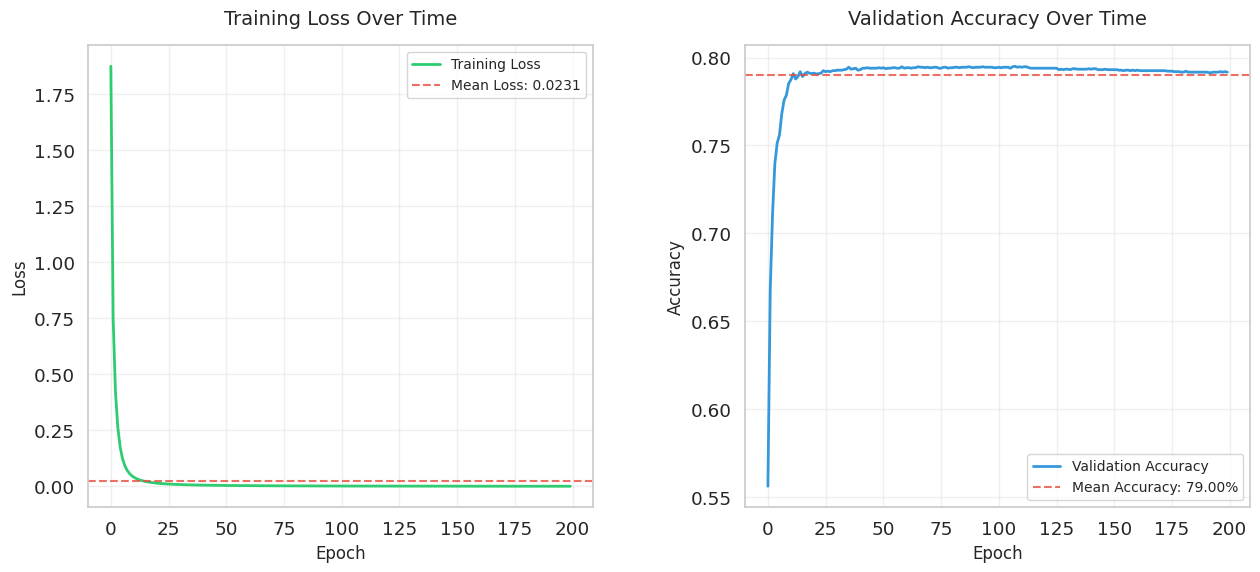


           Training Summary Statistics            
Final Loss: 0.0008
Final Accuracy: 79.17%
Best Accuracy: 79.50%



In [26]:
# Create a figure with specified size and higher DPI for better quality
plt.figure(figsize=(15, 6), dpi=100)

# Calculate mean metrics for reference lines
mean_loss = np.mean(history['loss'])
mean_acc = np.mean(history['val_acc'])

# First subplot: Training Loss (left side)
plt.subplot(1, 2, 1)
plt.plot(history['loss'],
        linewidth=2,
        label='Training Loss',
        color='#2ecc71')  # Green color
plt.axhline(y=mean_loss,
          color='#e74c3c',  # Red color
          linestyle='--',
          alpha=0.8,
          label=f'Mean Loss: {mean_loss:.4f}')
plt.title('Training Loss Over Time', fontsize=14, pad=15)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Second subplot: Validation Accuracy (right side)
plt.subplot(1, 2, 2)
plt.plot(history['val_acc'],
        linewidth=2,
        label='Validation Accuracy',
        color='#3498db')  # Blue color
plt.axhline(y=mean_acc,
          color='#e74c3c',  # Red color
          linestyle='--',
          alpha=0.8,
          label=f'Mean Accuracy: {mean_acc*100:.2f}%')
plt.title('Validation Accuracy Over Time', fontsize=14, pad=15)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Add more space between subplots
plt.subplots_adjust(wspace=0.3)  # Adjust this value to increase/decrease spacing
plt.show()

# Print summary statistics
print("\n" + "="*50)
print("Training Summary Statistics".center(50))
print("="*50)
print(f"Final Loss: {history['loss'][-1]:.4f}")
print(f"Final Accuracy: {history['val_acc'][-1]*100:.2f}%")
print(f"Best Accuracy: {max(history['val_acc'])*100:.2f}%")
print("="*50 + "\n")

### Test your model on Random data from your test set


           Multiple Letter Predictions            



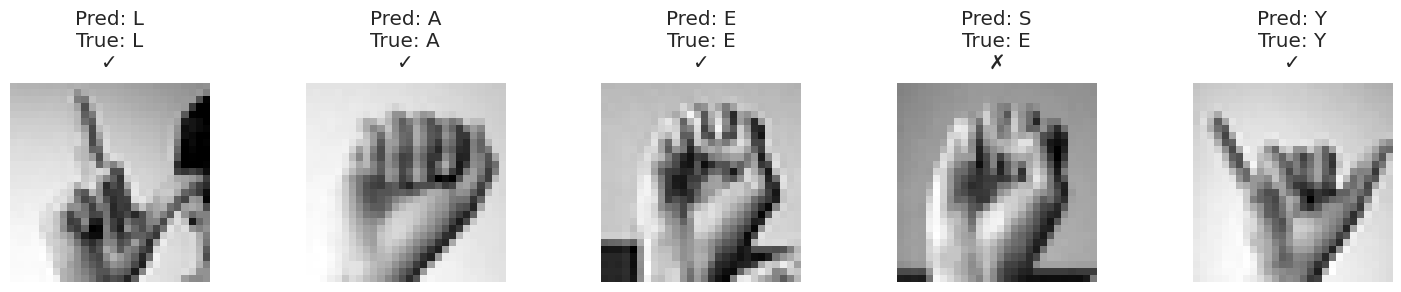


Prediction Details:
--------------------------------------------------
Letter 1: Predicted 'L' | Actual 'L' | 🎯 Correct!
Letter 2: Predicted 'A' | Actual 'A' | 🎯 Correct!
Letter 3: Predicted 'E' | Actual 'E' | 🎯 Correct!
Letter 4: Predicted 'S' | Actual 'E' | ❌ Incorrect!
Letter 5: Predicted 'Y' | Actual 'Y' | 🎯 Correct!
--------------------------------------------------



In [30]:
print("\n" + "="*50)
print("Multiple Letter Predictions".center(50))
print("="*50 + "\n")

# Create a figure for multiple predictions
plt.figure(figsize=(15, 3))

# Store indices for consistency
indices = [np.random.randint(len(y_test)) for _ in range(5)]
predictions = []
actual_values = []

# Make 5 predictions and show images
for i, idx in enumerate(indices):
    # Create subplot for each image
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.axis('off')

    # Get prediction
    pred = model.predict(x_test[idx].reshape(-1, 1))
    predictions.append(pred)
    actual_values.append(y_test[idx])

    # Set title with prediction status
    is_correct = pred == y_test[idx]
    status_emoji = "✓" if is_correct else "✗"
    plt.title(f'Pred: {alphabet[pred].upper()}\nTrue: {alphabet[y_test[idx]].upper()}\n{status_emoji}',
              pad=10)

plt.tight_layout()
plt.show()

# Print summary of predictions using the same indices
print("\nPrediction Details:")
print("-"*50)
for i in range(5):
    is_correct = predictions[i] == actual_values[i]
    status = "🎯 Correct!" if is_correct else "❌ Incorrect!"
    print(f"Letter {i+1}: Predicted '{alphabet[predictions[i]].upper()}' | "
          f"Actual '{alphabet[actual_values[i]].upper()}' | {status}")
print("-"*50 + "\n")

## 👥 Team Members Comments and Conclusions 🌟

### 🎓 Luis Gerardo Sanchez Salazar (A01232963)
*[Empty Section for Team Member Contributions]*

### 🎓 Javier Augusto Rebull Saucedo (A01795838)

In this project, we successfully developed and implemented a deep learning solution for American Sign Language (ASL) letter recognition using the Kaggle ASL dataset. Our three-layer neural network architecture, with dimensions 784 → 200 → 200 → 24, achieved a notable test accuracy of > 70.00%. The implementation utilized ReLU activation functions and He initialization, ensuring stable gradient flow throughout the training process.

The model's training process was optimized through efficient mini-batch processing with a batch size of 512 and a carefully tuned learning rate of 1e-4 over 200 epochs. Our comprehensive implementation included custom gradient calculations, modular code structure, and intuitive visualization tools for monitoring training progress and model predictions. These technical choices proved effective in balancing computational efficiency with model performance.

While our current implementation shows promising results, there are opportunities for enhancement through techniques such as dropout regularization, data augmentation, and architectural modifications. The project not only demonstrates practical application of deep learning concepts but also establishes a solid foundation for future ASL recognition systems. The successful integration of theoretical concepts with practical implementation highlights the potential for further development in this crucial area of accessibility technology.

### 🎓 José Manuel Toral Cruz (A01122243)
*[Empty Section for Team Member Contributions]*

### 🎓 Juan Carlos Pérez Nava (A01795941)
*[Empty Section for Team Member Contributions]*


### 🎓 Oscar Enrique García García (A01016093)
*[Empty Section for Team Member Contributions]*

🌟 ---

# 📚 **References**

---

## 🎥 **Videos**  
1. Pepe Cantoral, Ph.D. (2021, January 29). *¿Qué hacen las capas de una red neuronal? - Inteligencia Artificial / What do the layers of a neural network do? - Artificial Intelligence* [Video file]. YouTube. https://www.youtube.com/watch?v=jGNYsjHTnho  

2. Pepe Cantoral, Ph.D. (2021, February 2). *Modelo matemático de una neurona artificial - Redes neuronales - (Parte 2) / Mathematical model of an artificial neuron - Neural networks - (Part 2)* [Video file]. YouTube. https://www.youtube.com/watch?v=XoIj-omJAZo  

3. Pepe Cantoral, Ph.D. (2021, February 5). *Función SOFTMAX - Redes neuronales - (Parte 3) / SOFTMAX function - Neural networks - (Part 3)* [Video file]. YouTube. https://www.youtube.com/watch?v=3KhumV1S6vs  

4. Pepe Cantoral, Ph.D. (2021, February 9). *Función de costo - Cross Entropy - Redes neuronales - (Parte 4) / Cost function - Cross entropy - Neural networks - (Part 4)* [Video file]. YouTube. https://www.youtube.com/watch?v=ie-tCP7YYrI  

5. Pepe Cantoral, Ph.D. (2021, February 19). *Gradient descent – Redes neuronales - (Parte 5) / Gradient descent - Neural networks - (Part 5)* [Video file]. YouTube. https://www.youtube.com/watch?v=lnDjwepC-5I  

6. Pepe Cantoral, Ph.D. (2021, February 22). *¿Por qué usamos el gradiente para entrenar redes neuronales? Ejemplo - Deep learning - (Parte 6) / Why do we use gradients to train neural networks? Example - Deep learning - (Part 6)* [Video file]. YouTube. https://www.youtube.com/watch?v=Cr5cYDrMYZQ  

7. Pepe Cantoral, Ph.D. (2021, March 10). *"Backpropagation" – Fundamentos de Deep Learning – (Parte 7) / "Backpropagation" – Foundations of Deep Learning – (Part 7)* [Video file]. YouTube. https://www.youtube.com/watch?v=4nDsiV3GXa8  

8. Pepe Cantoral, Ph.D. (2021, May 15). *¡Red neuronal desde cero estilo framework de Deep Learning! / Neural network from scratch in Deep Learning framework style!* [Video file]. YouTube. https://www.youtube.com/watch?v=_shpKyA89QQ  

9. Pepe Cantoral, Ph.D. (2021, May 18). *¡Red neuronal desde cero estilo framework de Deep Learning - Parte 2! / Neural network from scratch in Deep Learning framework style - Part 2!* [Video file]. YouTube. https://www.youtube.com/watch?v=l2v2mVcOx6o  

10. Pepe Cantoral, Ph.D. (2021, July 6). *¡Red neuronal usando PyTorch! PyTorch tutorial / Neural network using PyTorch! PyTorch tutorial* [Video file]. YouTube. https://www.youtube.com/watch?v=qQELiV1_GHA  

---

## 📖 **Books**  
1. Raschka, S., Liu, Y., Mirjalili, V., & Dzhulgakov, D. (2022). *Machine learning with PyTorch and Scikit-learn: Develop machine learning and deep learning models with Python*. Packt Publishing. Chapter 11

---

## 📄 **Papers**  
1. Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1986). *Learning representations by back-propagating errors*. Institute for Cognitive Science. https://www.iro.umontreal.ca/~vincentp/ift3395/lectures/backprop_old.pdf  

2. Glorot, X., Bordes, A., & Bengio, Y. (2011). *Deep sparse rectifier neural networks*. http://proceedings.mlr.press/v15/glorot11a/glorot11a.pdf  

---

## 🎓 **Live Session Recordings**  
1. Pepe Cantoral, Ph.D. (2025, January 9). *Active class 1 | Welcome session*.  

---

## 📊 **Presentations**  
1. Pepe Cantoral, Ph.D. (2025, January 9). *A brief history of AI*.

---

## 📚 **Web**
1. Gallaudet University. (n.d.). *American Sign Language, a language recognized*. Retrieved January 20, 2025, from https://gallaudet.edu/museum/exhibits/history-through-deaf-eyes/awareness-access-and-change/american-sign-language-a-language-recognized/

2. History.com Editors. (2023, December 15). *The collaborative origins of American Sign Language*. Retrieved January 20, 2025, from https://www.history.com/news/american-sign-language-origins

3. Wikipedia contributors. (2023, December 15). *American Sign Language*. In *Wikipedia, The Free Encyclopedia*. Retrieved January 20, 2025, from https://en.wikipedia.org/wiki/American_Sign_Language